In [1]:
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table("SchaffersTournament.txt", header = -1)

In [3]:
df.head()

,0
0,"46,18,18,,144,0.09917393504109029,true"
1,Score: 7.348220472334983
2,Runtime: 486ms
3,"20,18,3,,141,0.030292338987345735,false"
4,Score: 9.922883338939645


In [4]:
score = []
param = []

for i in range(df.shape[0]):
    if df[0][i][:5] == "Score":
        score.append(float(df[0][i][7:]))
    elif df[0][i][:7] != "Runtime":
        param.append(df[0][i].split(","))

score = pd.Series(score)
param = pd.DataFrame(param)
df = pd.concat([score, param], axis=1)
df.head()

,0,0,1,2,3,4,5,6
0,7.348220,46,18,18,,144,0.09917393504109029,true
1,9.922883,20,18,3,,141,0.030292338987345735,false
2,9.972748,31,14,1,,217,0.457121520978522,false
3,9.800260,5,3,1,,35,0.9319614372420029,true
4,9.436962,49,18,15,,150,0.2119008948201313,false


In [5]:
df.shape, param.shape, score.shape

((5000, 8), (5000, 7), (5000L,))

In [6]:
df.columns = ["score", "populationSize", "tournamentSize", "tournamentWinners", "x", "parentSize", "selectionRate", "random"]
del df["x"]
df["populationSize"] = df.populationSize.astype(float)
df["tournamentSize"] = df.tournamentSize.astype(float)
df["tournamentWinners"] = df.tournamentWinners.astype(float)
df["parentSize"] = df.parentSize.astype(float)
df["selectionRate"] = df.selectionRate.astype(float)

df["tournamentSize"] =df.tournamentSize / df.populationSize
df["tournamentWinners"] = df.tournamentWinners / df.tournamentSize / df.populationSize
df["selectionRate"] = 1 / (df.populationSize / df.parentSize)
del df["parentSize"]

df.head()

,score,populationSize,tournamentSize,tournamentWinners,selectionRate,random
0,7.348220,46.0,0.391304,1.000000,3.130435,true
1,9.922883,20.0,0.900000,0.166667,7.050000,false
2,9.972748,31.0,0.451613,0.071429,7.000000,false
3,9.800260,5.0,0.600000,0.333333,7.000000,true
4,9.436962,49.0,0.367347,0.833333,3.061224,false


In [7]:
df[df.score == max(df.score)]

,score,populationSize,tournamentSize,tournamentWinners,selectionRate,random
4611,9.996644,58.0,0.482759,0.035714,5.0,false


In [8]:
from scipy.interpolate import LSQUnivariateSpline

def interpolate(df):

    for par in df.columns[[1,2,3,4]]:
        df = df.sort_values(by=[par]).reset_index(drop=True)

        x = np.array(df[par].astype(float))
        y = np.array(df.score)
        t = x[[len(df)/5,2*len(df)/5,3*len(df)/5,4*len(df)/5]] ## np.array([10,20,30,40])

        spl = LSQUnivariateSpline(x, y, t)
        ynew = spl(x)

        argmax = df[par][df.score == max(df.score)].values[0]

        plt.figure()
        plt.title("Random Search Custom Alg on Schaffers")
        plt.scatter(x,y, c='b')
        plt.plot(x, ynew, 'r')
        plt.xlim(min(x), max(x))
        plt.ylim(min(df.score), max(df.score))
        plt.xlabel(par)
        plt.ylabel('-log10(10 - score)')
        # plt.plot([argmax, argmax], [0,20], 'r')
        plt.show()
        print argmax
    

In [9]:
from scipy.interpolate import LSQBivariateSpline
from mpl_toolkits.mplot3d import Axes3D

def plot3d(df, bnd):
    for i in range(1,5):
        for j in range(1,5):
            if i > j:
                pi = df.columns[i]
                pj = df.columns[j]
                
                color= ['red' if l == 'true' else 'blue' for l in df["random"]]

                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                
                ax.scatter(df[pi], df[pj], df.score, c=color)
                ax.set_xlabel(pi)
                ax.set_ylabel(pj)
                ax.set_zlabel('score')

                plt.show()
                                
                t1 = sorted(df[pi][[len(df)/5,2*len(df)/5,3*len(df)/5,4*len(df)/5]])
                t2 = sorted(df[pj][[len(df)/5,2*len(df)/5,3*len(df)/5,4*len(df)/5]])
                              
                surface = LSQBivariateSpline(x=df[pj], y=df[pi], z=df.score, tx=t1, ty=t2)
                    
                mx1 = min(df[pi]) 
                mx2 = max(df[pi]) 
                my1 = min(df[pj]) 
                my2 = max(df[pj])                 
                x2 = np.arange(mx1, mx2, (mx2 - mx1)/50)[:50]
                y2 = np.arange(my1, my2, (my2 - my1)/50)[:50]
                X2, Y2 = np.meshgrid(x2,y2)
                Z2 = surface.ev(X2, Y2)               
                
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.plot_wireframe(X2, Y2, Z2, color='k')
                plt.show()
                
                
                dfx = df[df.score > bnd]
                color= ['red' if l == 'true' else 'blue' for l in dfx.random]
                
                plt.figure()
                plt.scatter(dfx[pi], dfx[pj], c=color)
                plt.xlabel(pi)
                plt.ylabel(pj)
                plt.xlim(min(df[pi]), max(df[pi]))
                plt.ylim(min(df[pj]), max(df[pj]))
                plt.title("Parameters for which score > " + str(bnd))
                plt.show()

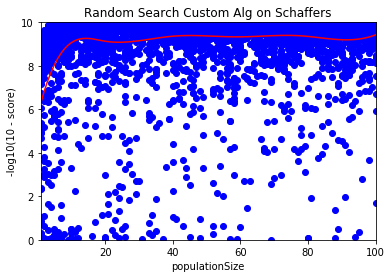

58.0


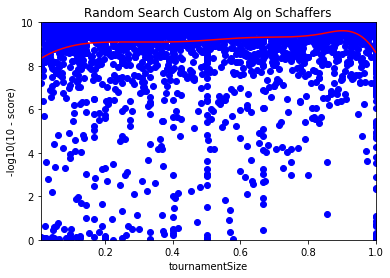

0.48275862069


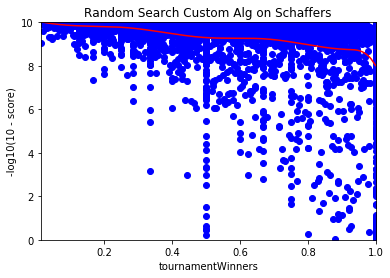

0.0357142857143


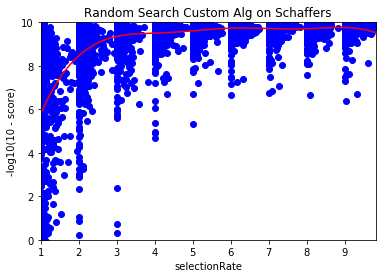

5.0


In [10]:
interpolate(df)

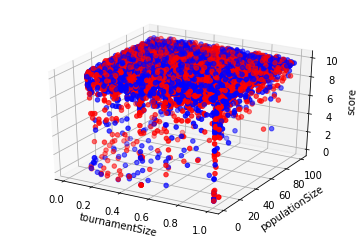

C:\Users\arjan\Anaconda2\lib\site-packages\scipy\interpolate\fitpack2.py:1117: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=48). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


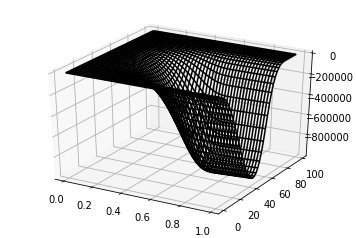

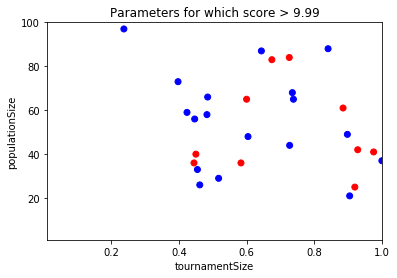

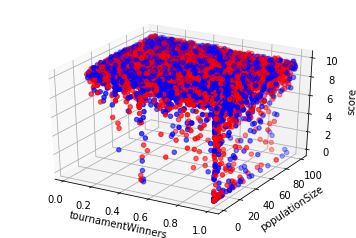

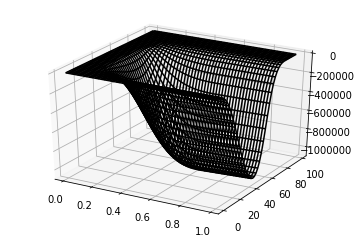

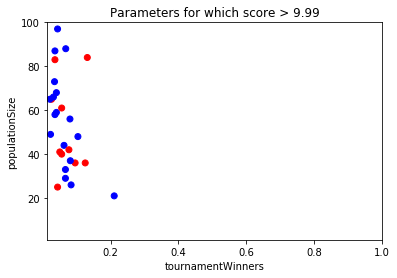

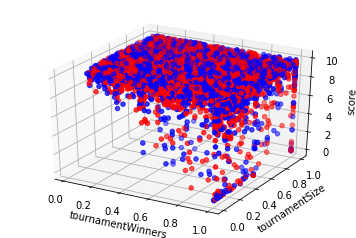

C:\Users\arjan\Anaconda2\lib\site-packages\scipy\interpolate\fitpack2.py:1117: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=2). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


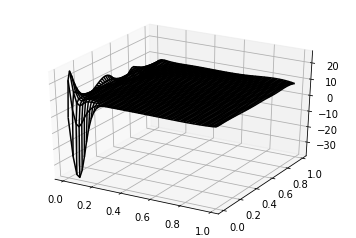

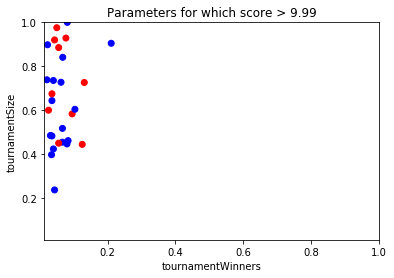

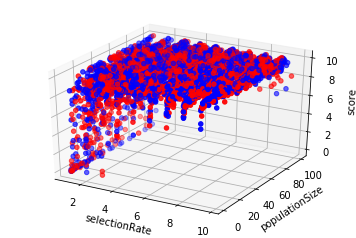

C:\Users\arjan\Anaconda2\lib\site-packages\scipy\interpolate\fitpack2.py:1117: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=32). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


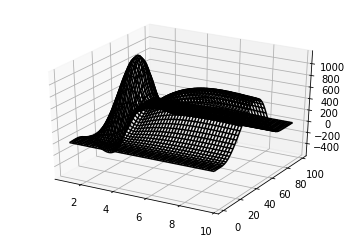

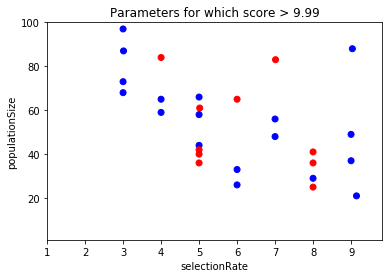

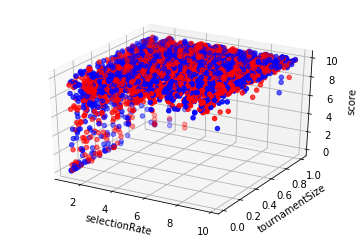

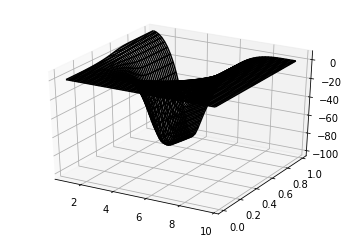

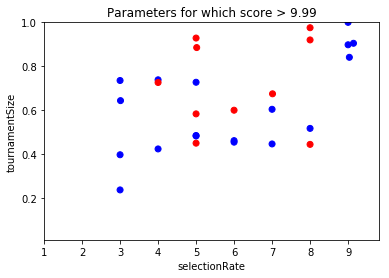

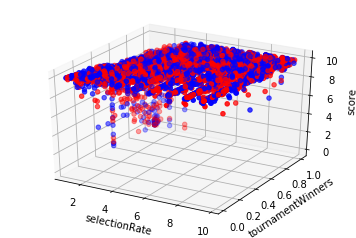

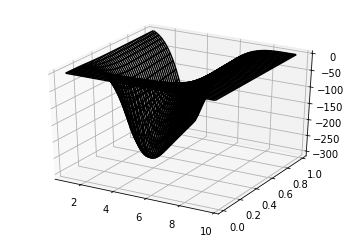

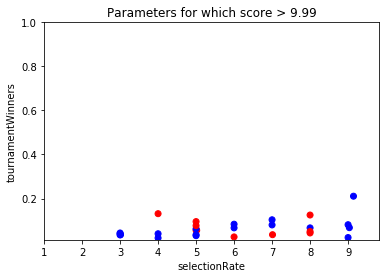

In [11]:
plot3d(df, 9.99)

In [12]:
df["score"] = df.score.apply(lambda x: -np.log10(10-x))

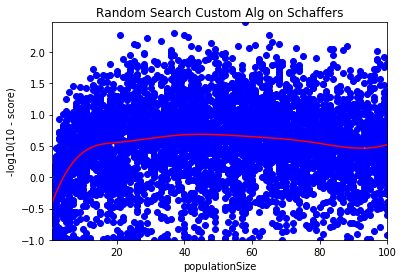

58.0


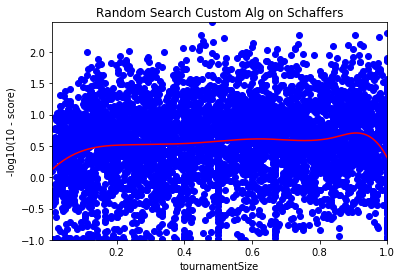

0.48275862069


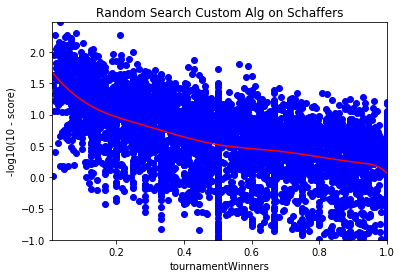

0.0357142857143


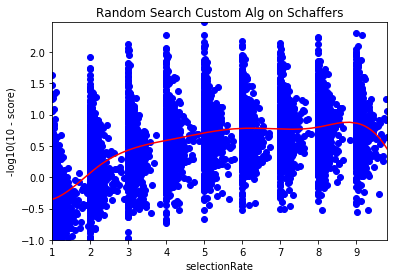

5.0


In [13]:
interpolate(df)

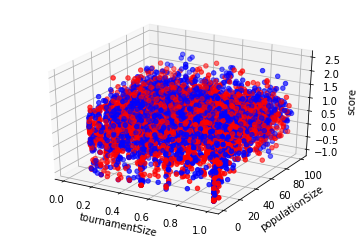

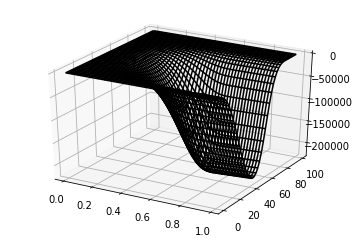

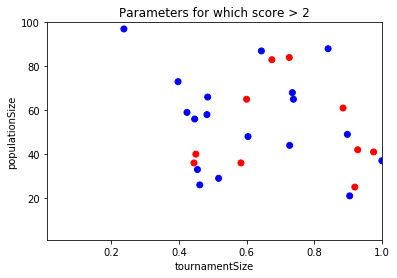

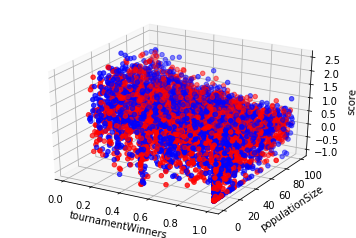

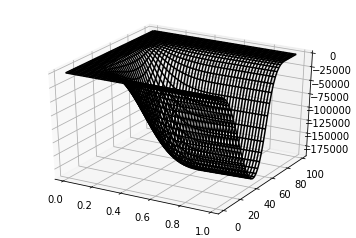

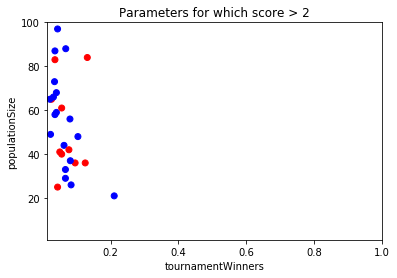

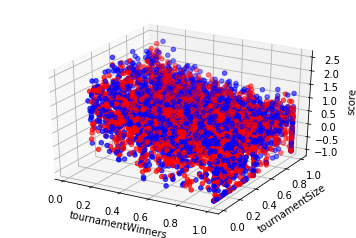

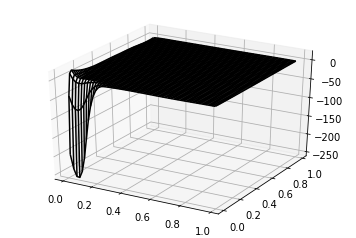

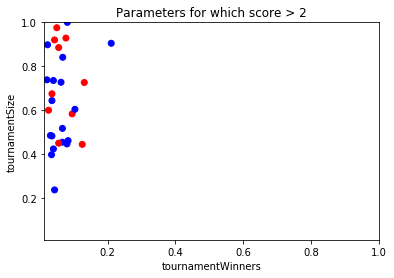

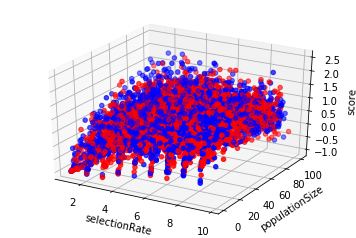

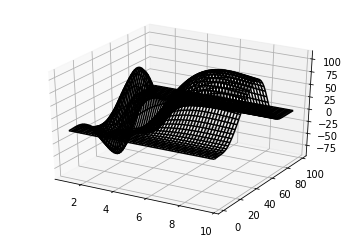

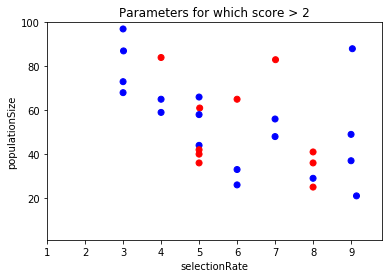

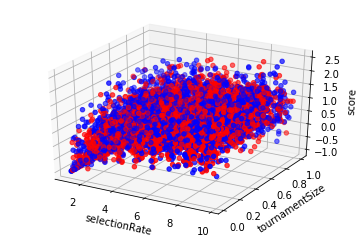

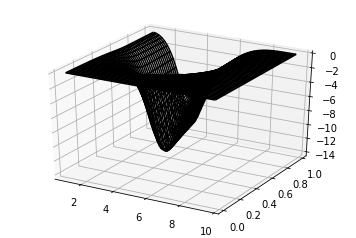

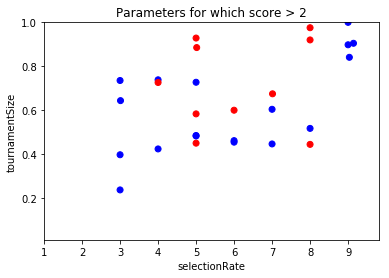

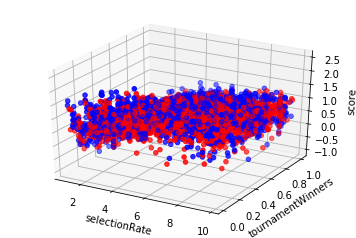

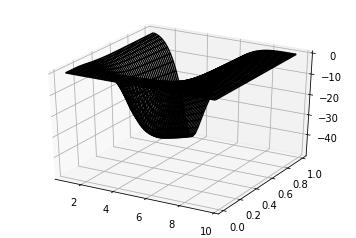

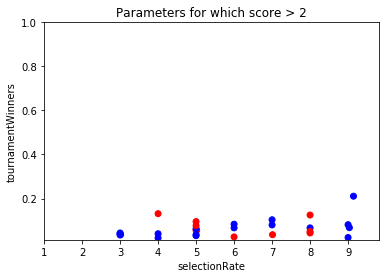

In [14]:
plot3d(df, 2)